# T5 code presentation. Erfan Shayegani - Pedram Zaree



#Imports

In [ ]:
!pip install transformers
!pip install sentencepiece
from transformers import T5Tokenizer, T5ForConditionalGeneration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 7.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00


#Define the model

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-large")
model = T5ForConditionalGeneration.from_pretrained("t5-large")



/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


#Different tasks with T5

In [ ]:

def similarity(text1, text2, model):
  model_input = 'stsb ' + 'sentence1: ' + text1 + '. ' + 'sentence2: ' + text2 + '.'
  input_ids = tokenizer(model_input, return_tensors="pt").input_ids
  outputs = model.generate(input_ids)
  print(tokenizer.decode(outputs[0], skip_special_tokens=True))



def summarization(text, model):
   model_input = 'summarize: ' + text + '.'
   input_ids = tokenizer(model_input, return_tensors="pt").input_ids
   outputs = model.generate(input_ids)
   print(tokenizer.decode(outputs[0], skip_special_tokens=True))



def translation(sentences, model, task_prefix = "translate English to German: "):
  """sentences = ["The house is wonderful.", "I like to work in NYC."]"""
  inputs = tokenizer([task_prefix + sentence for sentence in sentences], return_tensors="pt", padding=True)
  output_sequences = model.generate(
      input_ids=inputs["input_ids"],
      attention_mask=inputs["attention_mask"],
      do_sample=False,  # disable sampling to test if batching affects output
  )
  for item in tokenizer.batch_decode(output_sequences, skip_special_tokens=True):
    print(item)



def classification(text, model):
  model_input = 'cola sentence: ' + text + '.'
  input_ids = tokenizer(model_input, return_tensors="pt").input_ids
  outputs = model.generate(input_ids)
  print(tokenizer.decode(outputs[0], skip_special_tokens=True))
  

# def question_answering(text, model):
#   model_input = 'question: ' + text + '?'
#   input_ids = tokenizer(model_input, return_tensors="pt").input_ids
#   outputs = model.generate(input_ids)
#   print(tokenizer.decode(outputs[0], skip_special_tokens=True))



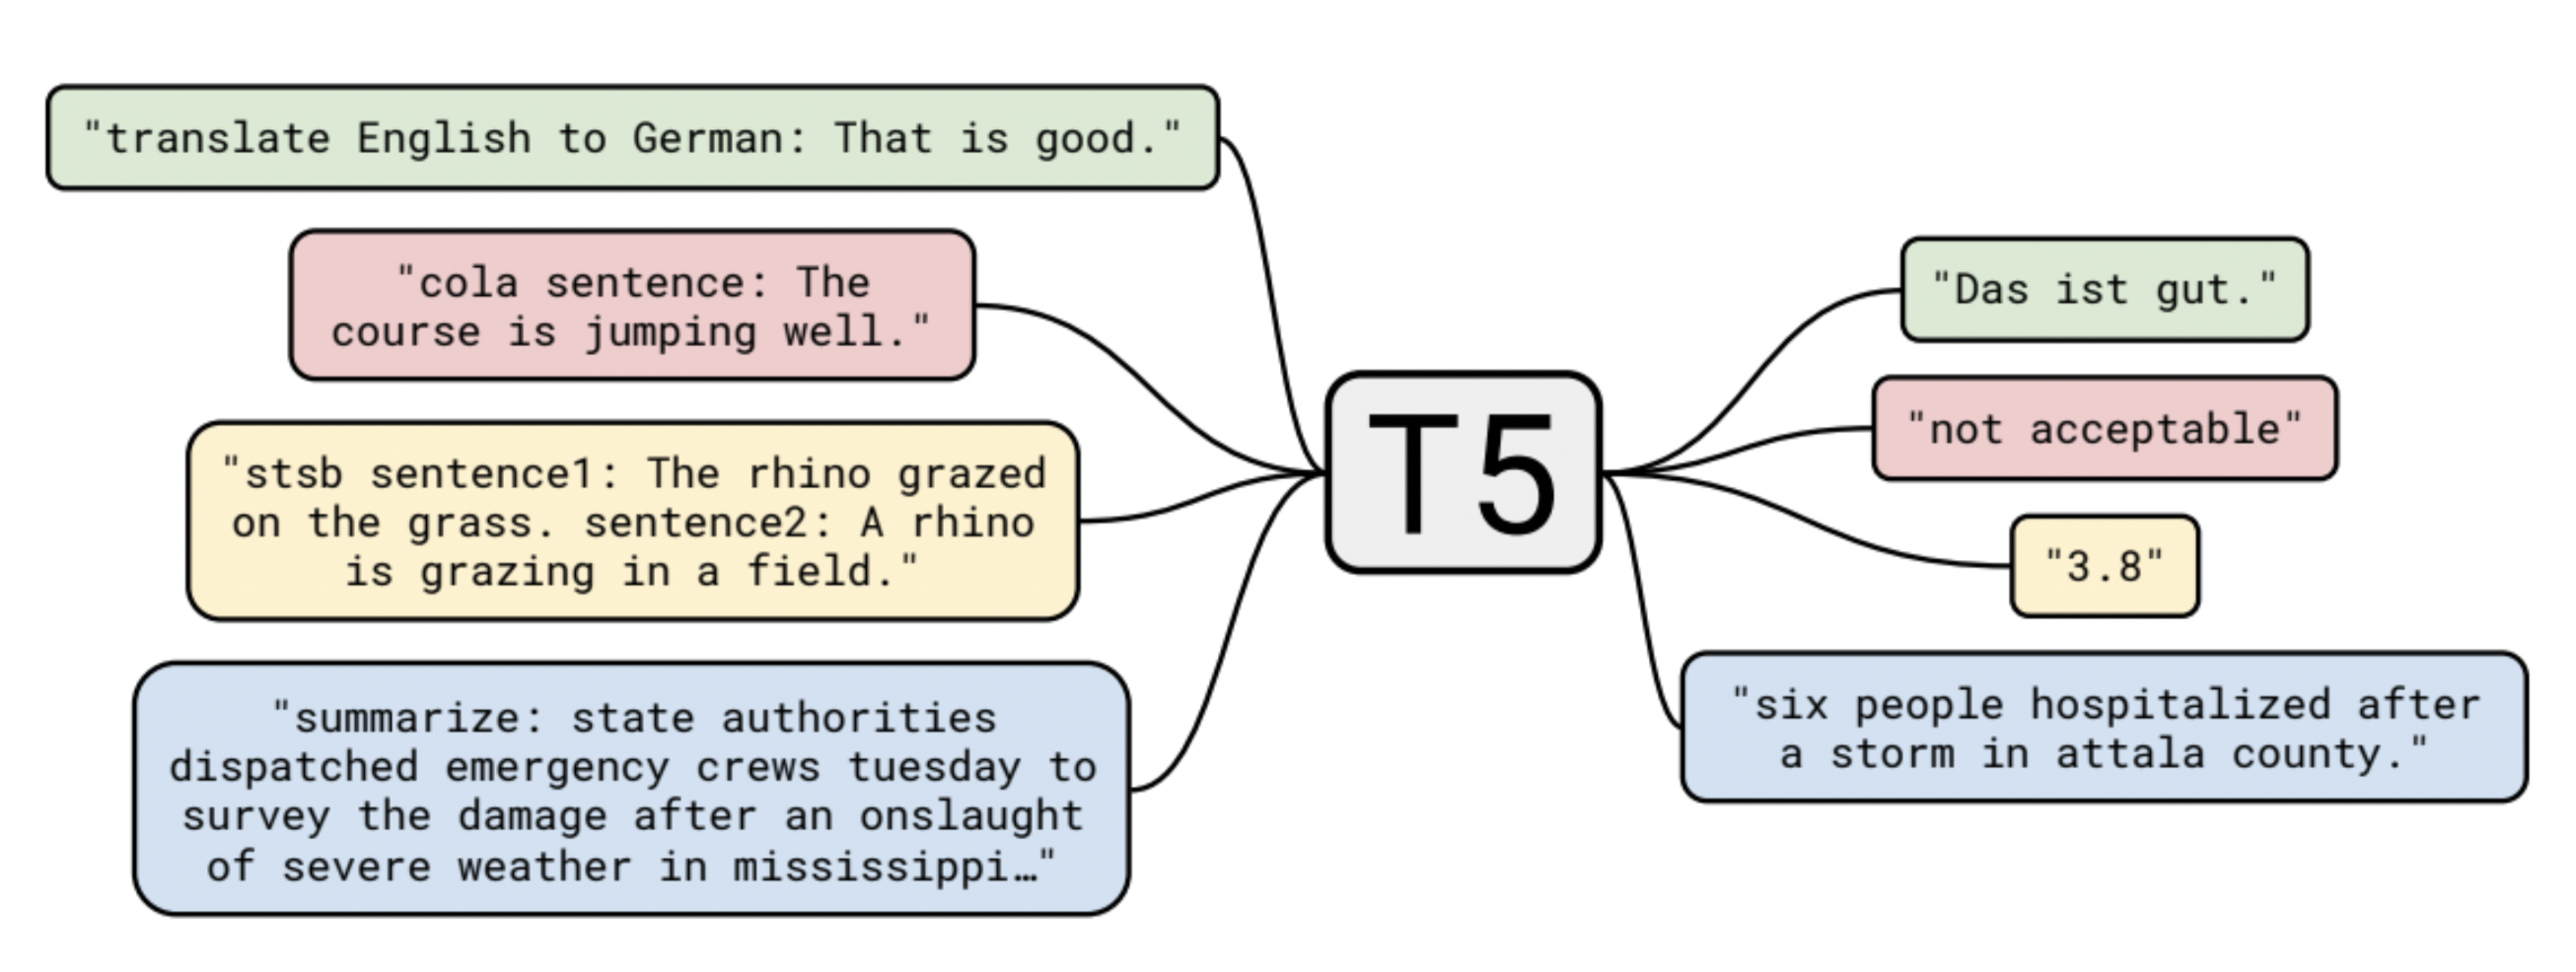

#Translation task

In [ ]:
# Here we define the list of sentences in English
sentences = [
    'I study at University of California Riverside',
    'The birds migrated to the south',
    'The black wolf could hunt the rabit',
    'Mary and Samantha arrived at the bus station early but waited until noon for the bus'
   
]

# By running this function 
translation(sentences, model, task_prefix = "translate English to German: ")


Ich studiere an der University of California Riverside
Die Vögel wanderten in den Süden
Der schwarze Wolf könnte den Rabit jagen
Mary und Samantha kamen früh an den Busbahnhof, aber warteten bis Mittag


#Similarity of texts

In [ ]:
# Define 2 similar sentences:
sent1 = 'Pedro study Master in the Computer Science'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

# Define 2 almost similar sentences:
sent1 = 'Pedro study P.h.D in the Computer Science'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

# Define 2 different sentences:
sent1 = 'There are many shopping in the downtown of San Diego'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

5.0
2.8
0.0


#Classification

In [ ]:
# set the input sentence:
text = 'A jungle can swim in the river'
classification(text, model)

text = 'A human can swim in the river'
classification(text, model)

unacceptable
acceptable


#Base model

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")


/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
# Here we define the list of sentences in English
sentences = [
    'I study at University of California Riverside',
    'The birds migrated to the south',
    'The black wolf could hunt the rabit',
    'Mary and Samantha arrived at the bus station early but waited until noon for the bus'
   
]

# By running this function 
translation(sentences, model, task_prefix = "translate English to German: ")

Ich studiere an der University of California Riverside
Die Vögel wanderten in den Süden
Der schwarze Wolf könnte den Rabit jagen
Mary und Samantha kamen früh an den Busbahnhof, aber warteten bis Mittag


In [ ]:
# Define 2 similar sentences:
sent1 = 'Pedro study Master in the Computer Science'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

# Define 2 almost similar sentences:
sent1 = 'Pedro study P.h.D in the Computer Science'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

# Define 2 different sentences:
sent1 = 'There are many shopping in the downtown of San Diego'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

5.0
3.6
0.0


In [ ]:
# set the input sentence:
text = 'A jungle can swim in the river'
classification(text, model)

text = 'A human can swim in the river'
classification(text, model)

acceptable
acceptable


#Small model

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
# Here we define the list of sentences in English
sentences = [
    'I study at University of California Riverside',
    'The birds migrated to the south',
    'The black wolf could hunt the rabit',
    'Mary and Samantha arrived at the bus station early but waited until noon for the bus'
   
]

# By running this function 
translation(sentences, model, task_prefix = "translate English to German: ")

Ich studiere an der University of California Riverside
Die Vögel wanderten in den Süden
Der schwarze Wolf könnte den Rabit jagen
Mary und Samantha kamen früh an den Busbahnhof, aber warteten bis Mittag


In [ ]:
# Define 2 similar sentences:
sent1 = 'Pedro study Master in the Computer Science'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

# Define 2 almost similar sentences:
sent1 = 'Pedro study P.h.D in the Computer Science'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

# Define 2 different sentences:
sent1 = 'There are many shopping in the downtown of San Diego'
sent2 = 'Pedro study Master in the Computer Science'
similarity(sent1, sent2, model)

5.0
4.0
0.0


In [ ]:
# set the input sentence:
text = 'A jungle can swim in the river'
classification(text, model)

text = 'A human can swim in the river'
classification(text, model)

acceptable
acceptable


#Summarization

### T5 - BART text summarization


This pipeline uses models that have been fine-tuned on a summarization task, namely 'bart-large-cnn' and 't5-large'


In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
wiki_data = requests.get("https://en.wikipedia.org/wiki/Coronavirus").text
soup = BeautifulSoup(wiki_data, 'lxml')

In [ ]:
soup, wiki_data

(<!DOCTYPE html>
 <html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" dir="ltr" lang="en">
 <head>
 <meta charset="utf-8"/>
 <title>Coronavirus - Wikipedia</title>
 <script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=document.cookie.mat

In [ ]:
data = []
for k in soup.select('p'):
  #append and remove citation in text, e.g. [1]
  data.append(re.sub("[\(\[].*?[\)\]]", "", k.getText())) 
data

['\n\t\t\t\tPages for logged out editors learn more\n',
 '\n',
 'Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold , while more lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis.\n',
 'Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales and realm Riboviria. They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry. The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses. They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an i

In [ ]:
data = ''.join([s for s in data if isinstance(s,str)])
spchar_list = ['\n', '/', '\\', '[', ']']
data = data.translate({ord(x): '' for x in spchar_list})
data = data.replace(".", ". ")
data

'\t\t\t\tPages for logged out editors learn moreCoronaviruses are a group of related RNA viruses that cause diseases in mammals and birds.  In humans and birds, they cause respiratory tract infections that can range from mild to lethal.  Mild illnesses in humans include some cases of the common cold , while more lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic.  In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales and realm Riboviria.  They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.  The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.  They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent 

In [ ]:
data = data[0:2500]
data

'\t\t\t\tPages for logged out editors learn moreCoronaviruses are a group of related RNA viruses that cause diseases in mammals and birds.  In humans and birds, they cause respiratory tract infections that can range from mild to lethal.  Mild illnesses in humans include some cases of the common cold , while more lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic.  In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales and realm Riboviria.  They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.  The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.  They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent 

In [ ]:
smr_bart = pipeline(task="summarization", model="facebook/bart-large-cnn")
smr_bart

In [ ]:
smbart = smr_bart(data, max_length=150)
print(smbart[0]['summary_text'])

Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold. More lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic.


In [ ]:
smr_t5 = pipeline(task="summarization", model="t5-large", framework="tf")
smt5 = smr_t5(data, max_length=150)
print(smt5[0]['summary_text'])

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-large.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (636 > 512). Running this sequence through the model will result in indexing errors
/usr/local/lib/python3.8/dist-packages/transformers/generatio

coronaviruses are enveloped viruses with a positive-sense single-stranded RNA genome . they cause respiratory tract infections that can range from mild to lethal . mild illnesses in humans include some cases of the common cold . more lethal varieties can cause SARS, MERS and COVID-19 .


BART output = Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold. More lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic.
________________________________________________________________________
T5 output = coronaviruses are enveloped viruses with a positive-sense single-stranded RNA genome . they cause respiratory tract infections that can range from mild to lethal . mild illnesses in humans include some cases of the common cold . more lethal varieties can cause SARS, MERS and COVID-19 .

### BART - GPT2 


In [ ]:
!pip install Markdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
from transformers import BartTokenizer, BartForConditionalGeneration

In [ ]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')



In [ ]:
article_input_ids = tokenizer.batch_encode_plus([data], return_tensors='pt', max_length=1024)['input_ids']
summary_ids = model.generate(article_input_ids,
                             num_beams=4,
                             length_penalty=1.0,
                             min_length = 900,
                             max_length=1000,
                             no_repeat_ngram_size=3)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
summary_txt = tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
display(('> **Summary: **'+summary_txt))

'> **Summary: **Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold. More lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic. In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent of the stellar corona. The name "coronavirus" is derived from Latin corona, meaning "crown" or "wreath", itself a borrowing from Greek \xa0korṓnē, "garland, wreath". The name was coined by June Almeida and David Tyrrell who first observed and studied human coronavirus in the 1960s. As of 2020, 45 species are officially recognised, with 45 species of coronavirus officially recognised in the world. The g

BART output: "> **Summary: **Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds. In humans and birds, they cause respiratory tract infections that can range from mild to lethal. Mild illnesses in humans include some cases of the common cold. More lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic."

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
gpt2_tok = GPT2Tokenizer.from_pretrained('gpt2')
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')


In [ ]:

# truncate to 869 tokens so that we have space to generate another 155
enc = gpt2_tok.encode(data, max_length=1024-155, return_tensors='pt') 
# Generate another 155 tokens
source_and_summary_ids = gpt2_model.generate(enc, max_length=150, do_sample=False)
# Only show the new ones
end_of_source = "An official statement said:" 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 591, but `max_length` is set to 150. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


In [ ]:
summary_gpt2 = gpt2_tok.decode(source_and_summary_ids[0]).split(end_of_source)
display(('> **GPT2:** ' + summary_gpt2[0]))

GPT2 output: Coronaviruses are a group of related RNA viruses that cause diseases in mammals and birds.  In humans and birds, they cause respiratory tract infections that can range from mild to lethal.  Mild illnesses in humans include some cases of the common cold, while more lethal varieties can cause SARS, MERS and COVID-19, which is causing the ongoing pandemic.  In cows and pigs they cause diarrhea, while in mice they cause hepatitis and encephalomyelitis. Coronaviruses constitute the subfamily Orthocoronavirinae, in the family Coronaviridae, order Nidovirales and realm Riboviria.  They are enveloped viruses with a positive-sense single-stranded RNA genome and a nucleocapsid of helical symmetry.  The genome size of coronaviruses ranges from approximately 26 to 32 kilobases, one of the largest among RNA viruses.  They have characteristic club-shaped spikes that project from their surface, which in electron micrographs create an image reminiscent of the stellar corona, from which their name derives. The name "coronavirus" is derived from Latin corona, meaning "crown" or "wreath", itself a borrowing from Greek κορώνη korṓnē, "garland, wreath".  The name was coined by June Almeida and David Tyrrell who first observed and studied human coronaviruses.  The word was first used in print in 1968 by an informal group of virologists in the journal Nature to designate the new family of viruses.  The name refers to the characteristic appearance of virions  by electron microscopy, which have a fringe of large, bulbous surface projections creating an image reminiscent of the solar corona or halo.  This morphology is created by the viral spike peplomers, which are proteins on the surface of the virus. The scientific name Coronavirus was accepted as a genus name by the International Committee for the Nomenclature of Viruses  in 1971.  As the number of new species increased, the genus was split into four genera, namely Alphacoronavirus, Betacoronavirus, Deltacoronavirus, and Gammacoronavirus in 2009.  The common name coronavirus is used to refer to any member of the subfamily Orthocoronavirinae.  As of 2020, 45 species are officially recognised. The earliest reports of a coronavirus infection in animals occurred in the late 1920s, when an acute respiratory infection of domesticated chickens emerged in North America.  Arthur Schalk and M. C.  Hawn in 1931 made the first detailed report which described a new respiratory infection of chicken in the United States.  The first coronavirus was reported in the United States in the early 1930s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 1940s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 1950s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 1960s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 1970s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 1980s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 1990s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 2000s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 2000s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 2000s, when a man who had been infected with a coronavirus in the United States was found to have a fever.  The first coronavirus was reported in the United States in the early 2000s,

### **As you can see, since GPT2 has not been fin-tuned on a summarization task, it cannot continue properly and it outputs repetitive content!!!**

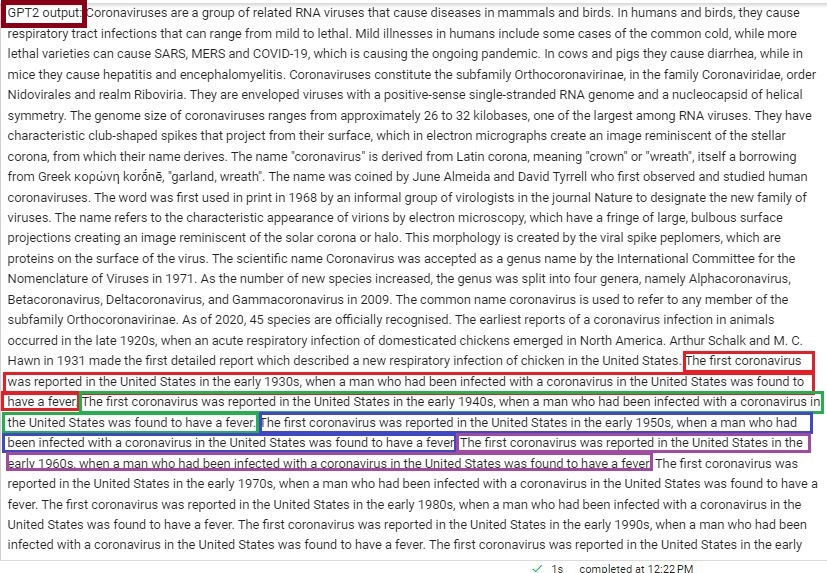

### Summarize the Reddit comment sections

In [ ]:
comment_section = ['you just know someone has made that joke with her',
 'was literally discussing this with my wife yesterday i am british she is not for some reason she thought i would know the answer to whether that would be a thing or not i did not so i guess it s a pretty common shower thought tbh',
 'pardon',
 'this chap s missus thought he might have a clue whether her maj will get a telegram from herself courtesy of herself when she tops a ton what with him being an englishman that help squire',
 'ha ha thanks for clarifying my apparently rambling train of thought',
 'my pleasure mate have a good un',
 'ah yes old bean much indebted',
 'i read that in a british accent well done cheers',
 'ikr i m british and i still read that in a noticeably british accent',
 'i read it in the most aussie accent ever',
 'aussie needs more oi and cunt',
 'that is the most british sentence i ve ever seen',
 'hmmm yes well played my good man',
 'i am chuffed by this whole exchange',
 'why does this sound like captain jack sparrow',
 'i ve pirated his accent',
 'when she tops a ton she ll have to start packing it on then i m not sure she s even ten stone',
 'english reddit intensifies',
 'honestly every brit should send the queen a card to her when she turns 100s she s nice enough to do it for everyone else',
 'imagine the other people she has sent cards to congratulating her back that would be perfect',
 'do we have the same wife im not british but for some reason my wife always asks me the most random shit as if i just have the answer waiting in my pocket u rexfordays',
 'contact the office of your member of parliament in canada if you turn 90 you can get a signed portrait of the prime minister trudeau in england boris johnson and when you turn 100 your mp can get you signed photo of queen elizabeth',
 'well i m over halfway to 90 now so will have to start getting that sorted',
 'we should all write letters to ourselves like that at some point stick it to our mirrors or something',
 'my gf leaves a note on the inside of our front door so i see it every morning when i leave for work since she s still asleep at that time it s supposed to be a reminder to take the trash with me but it just says trash so it s really a reminder of me as a man',
 'this made me laugh if i had awards i d give one i dont so i m just gonna start doing this for my boyfriend',
 'just a heads up to anyone who doesn t know which included me recently reddit will give you a free award to give out every so often can be redeemed when you click on the golden coin where they want you to buy their shit',
 'that s awesome thanks for the info so excited to spread the reddit love',
 'i m giving you mine as a thank you for telling us this']

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')
text = ".".join(comment_section)
Preprocessed_text = "summarize: " + text #(summarize) is the prefix as discussed in the paper, to distinguish different tasks.
tokens_input = tokenizer.encode(Preprocessed_text,return_tensors="pt", max_length=512, truncation=True)
summary_ids = model.generate(tokens_input,
                              min_length=60,
                              max_length=180,
                              length_penalty=4.0)
summary = tokenizer.decode(summary_ids[0])
print(summary)

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


<pad> i am british but my wife always asks me the most random shit. i guess it s a pretty common shower thought tbh. i read that in a british accent.i still read that in the most aussie accent ever.aussie needs more oi and cunt.that is the most british sentence i ve ever seen.</s>


In [ ]:
display(summary)

'<pad> i am british but my wife always asks me the most random shit. i guess it s a pretty common shower thought tbh. i read that in a british accent.i still read that in the most aussie accent ever.aussie needs more oi and cunt.that is the most british sentence i ve ever seen.</s>'